In [ ]:
!nvidia-smi

Thu Jul 14 15:38:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |    724MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# For time stamps
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tata-steel.csv")

In [ ]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65


In [ ]:
df.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
1480,28-Jun-21,1174.95,1189.20,1163.2,1184.05,1179.142175,749944,14773,884290599,112782.0,15.04,26.00,9.10
1481,29-Jun-21,1186.00,1195.00,1165.5,1172.45,1177.493063,675052,18471,794869047,197679.0,29.28,29.50,-13.55
1482,30-Jun-21,1179.50,1190.95,1162.5,1166.85,1180.272142,326616,8916,385495766,44078.0,13.50,28.45,-12.65
1483,01-Jul-21,1170.05,1176.55,1156.9,1163.35,1166.601920,351105,10332,409599767,66928.0,19.06,19.65,-6.70
1484,02-Jul-21,1165.00,1166.50,1130.5,1135.95,1145.869906,382616,10128,438428160,105980.0,27.70,36.00,-29.05


In [ ]:
df.shape

(1485, 13)

In [ ]:
len(df)

1485

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1485 non-null   object 
 1   Open Price                 1485 non-null   float64
 2   High Price                 1485 non-null   float64
 3   Low Price                  1485 non-null   float64
 4   Close Price                1485 non-null   float64
 5   WAP                        1485 non-null   float64
 6   No.of Shares               1485 non-null   int64  
 7   No. of Trades              1485 non-null   int64  
 8   Total Turnover (Rs.)       1485 non-null   int64  
 9   Deliverable Quantity       1484 non-null   float64
 10  % Deli. Qty to Traded Qty  1484 non-null   float64
 11  Spread High-Low            1485 non-null   float64
 12  Spread Close-Open          1485 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage:

In [ ]:
df.shape

(1485, 10)

In [ ]:
df=df.drop('WAP',axis=1)
df=df.drop('No.of Shares',axis=1)
df=df.drop('No. of Trades',axis=1)
df=df.drop('Total Turnover (Rs.)',axis=1)
df=df.drop('Deliverable Quantity',axis=1)
df=df.drop('% Deli. Qty to Traded Qty',axis=1)
df=df.drop('Spread High-Low',axis=1)
df=df.drop('Spread Close-Open',axis=1)
df.head()

,Date,Open Price,High Price,Low Price,Close Price
0,03-Jul-15,308.00,308.00,299.75,300.95
1,06-Jul-15,294.90,299.60,292.30,298.75
2,07-Jul-15,300.75,303.25,296.00,297.45
3,08-Jul-15,293.80,294.00,282.00,283.40
4,09-Jul-15,285.20,287.25,279.60,280.55


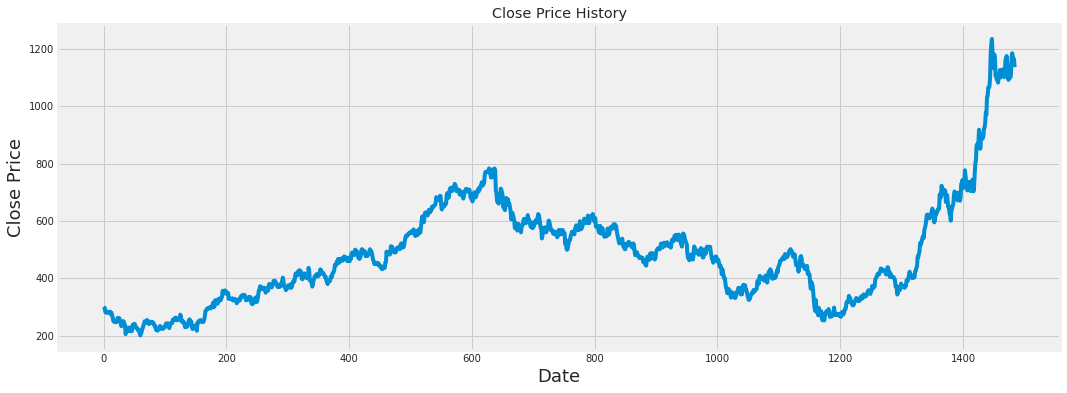

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

1114

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09646022],
       [0.09432957],
       [0.09307055],
       ...,
       [0.93506368],
       [0.93167401],
       [0.90513777]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.09646022, 0.09432957, 0.09307055, 0.07946346, 0.07670331,
       0.0770907 , 0.08048036, 0.07781705, 0.07684858, 0.07762336,
       0.08033509, 0.08004455, 0.0709893 , 0.07650961, 0.06677643,
       0.06174035, 0.04847223, 0.04648685, 0.04774587, 0.04551838,
       0.04450148, 0.04517941, 0.05331461, 0.05898019, 0.05806014,
       0.0587865 , 0.05791487, 0.04411409, 0.04624473, 0.03123335,
       0.03462302, 0.04377512, 0.04871435, 0.04701951, 0.03902959,
       0.03476829, 0.00464869, 0.01239649, 0.01370394, 0.02372766,
       0.02629413, 0.02295288, 0.01438187, 0.01772311, 0.02740787,
       0.01704518, 0.01409133, 0.02658467, 0.03670524, 0.03772214,
       0.03070069, 0.03869062, 0.02682679, 0.02794054, 0.02634255,
       0.02469614, 0.01806208, 0.0191274 , 0.01360709, 0.00784466])]
[0.0]

[array([0.09646022, 0.09432957, 0.09307055, 0.07946346, 0.07670331,
       0.0770907 , 0.08048036, 0.07781705, 0.07684858, 0.07762336,
       0.08033509, 0.08004455, 0.0709893 , 0.076509

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
66/66 [==============================] - 10s 10ms/step - loss: 0.0038
Epoch 2/100
66/66 [==============================] - 1s 9ms/step - loss: 4.4928e-04
Epoch 3/100
66/66 [==============================] - 1s 9ms/step - loss: 4.7286e-04
Epoch 4/100
66/66 [==============================] - 1s 8ms/step - loss: 3.6894e-04
Epoch 5/100
66/66 [==============================] - 1s 9ms/step - loss: 3.6483e-04
Epoch 6/100
66/66 [==============================] - 1s 8ms/step - loss: 3.7847e-04
Epoch 7/100
66/66 [==============================] - 1s 9ms/step - loss: 3.4872e-04
Epoch 8/100
66/66 [==============================] - 1s 8ms/step - loss: 3.1743e-04
Epoch 9/100
66/66 [==============================] - 1s 9ms/step - loss: 2.7592e-04
Epoch 10/100
66/66 [==============================] - 1s 9ms/step - loss: 3.7747e-04
Epoch 11/100
66/66 [==============================] - 1s 9ms/step - loss: 2.7433e-04
Epoch 12/100
66/66 [==============================] - 1s 9ms/step - loss: 2.

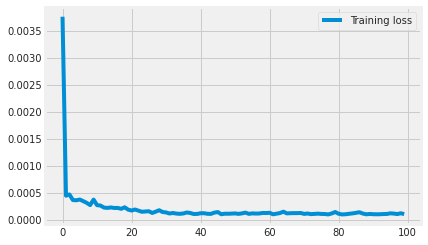

In [ ]:
loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE) and mean squared error (MSE)
mse = np.mean(((predictions - y_test) ** 2))
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('MSE  :',mse)
print('RMSE :',rmse)

MSE  : 274.30302169061673
RMSE : 16.562095932901027


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


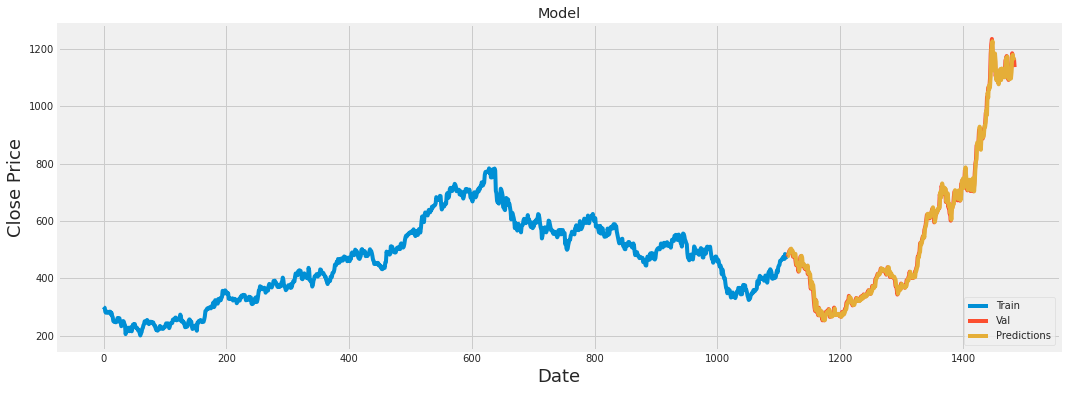

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close Price,Predictions
1114,475.55,477.641052
1115,483.00,477.549927
1116,486.55,484.985382
1117,495.55,488.447205
1118,498.45,497.444397
...,...,...
1480,1184.05,1174.055542
1481,1172.45,1178.607056
1482,1166.85,1162.445679
1483,1163.35,1162.328857
